# Exploratory Data Analysis

## Importing necessary packages

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Reading the data

In [2]:
df = pd.read_csv("datasets/dataset_mood_smartphone.csv", index_col=0)

df.head()

,id,time,variable,value
1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


## Using the data profiling to generate a rough report of data

In [3]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_file('EDA_report.html')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Looking at each feature in more depth

### ID

Number of unique 'IDs' in the dataset

In [4]:
df['id'].nunique()

27

Plotting the distribution of these IDs

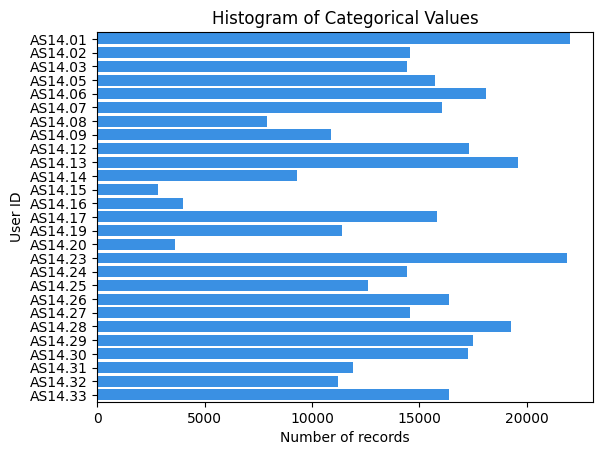

In [5]:
sns.countplot(y='id', data=df, color='dodgerblue')

plt.title('Histogram of Categorical Values')
plt.ylabel('User ID')
plt.xlabel('Number of records')

plt.show()

### Time

In [6]:
df['time'].nunique()

336907

Do all of the entries follow the same regex?

In [7]:
pattern = r'^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d{3}$'

df['time'].str.match(pattern).all()

True

What are the earliest and latest times?

In [11]:
df['time'] = pd.to_datetime(df['time'])

min_datetime = df['time'].min()
max_datetime = df['time'].max()
print("Minimum datetime:", min_datetime)
print("Maximum datetime:", max_datetime)

Minimum datetime: 2014-02-17 07:00:52.197000
Maximum datetime: 2014-06-09 00:00:00


Visualizing this feature. Since we have a huge number of different times, we use a density plot that estimates the density rather than absolute frequencies (Like estimating PDF rather than plotting a histogram). Is uses kernel density estination. 

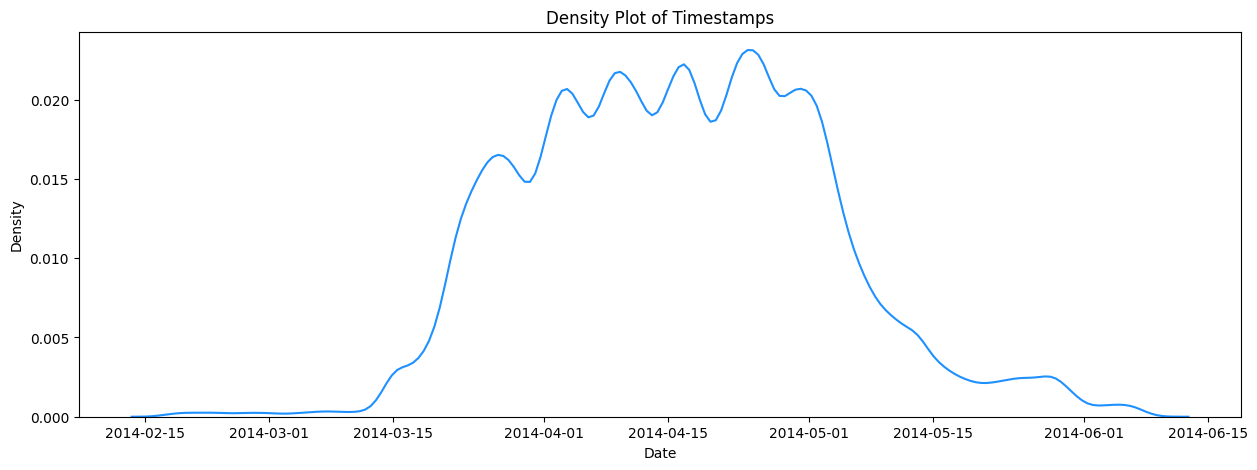

In [15]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data=df, x='time', color='dodgerblue')
plt.title('Density Plot of Timestamps')
plt.xlabel('Date')
plt.ylabel('Density')
plt.show()

### Variable

In [19]:
df['variable'].nunique()

19

In [22]:
df['variable'].unique()

array(['mood', 'circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather'],
      dtype=object)

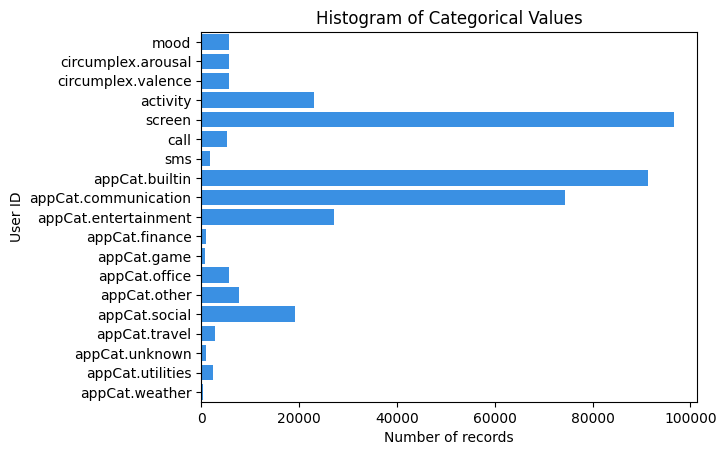

In [23]:
sns.countplot(y='variable', data=df, color='dodgerblue')

plt.title('Histogram of Categorical Values')
plt.ylabel('User ID')
plt.xlabel('Number of records')

plt.show()

### Value

In [27]:
df['variable'].shape

(376912,)

Plotting values

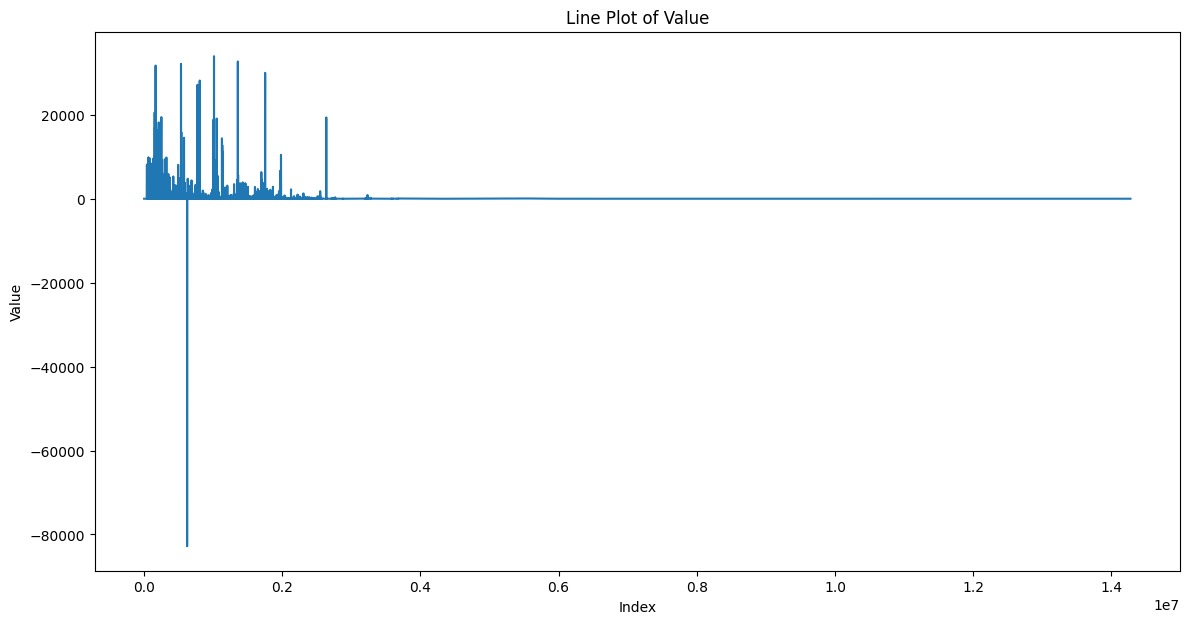

In [28]:
plt.figure(figsize=(14, 7)) 
sns.lineplot(data=df['value'])

plt.title('Line Plot of Value')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()


Almost all values are positive. There might be an error! Lets filter it out

In [38]:
# This will also drop nan values
filtere_values = df[df['value'] >= 0]['value']


# How many values did we filter out?

df['value'].shape[0] - filtere_values.shape[0]

2659

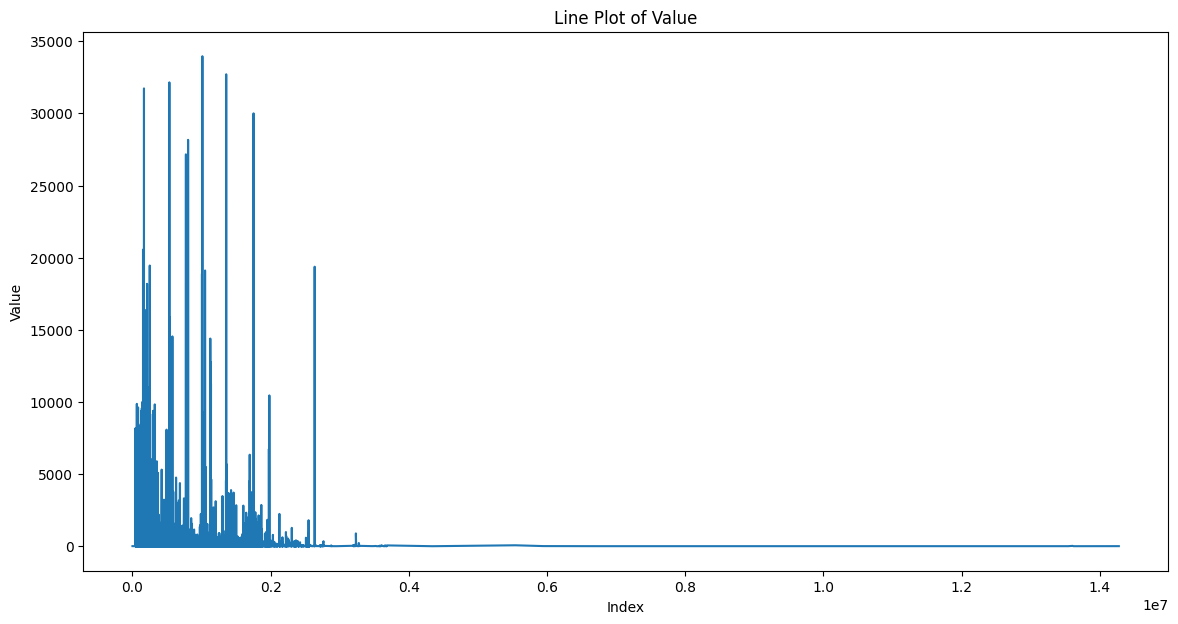

In [39]:
plt.figure(figsize=(14, 7)) 
sns.lineplot(data=filtere_values)

plt.title('Line Plot of Value')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

Does not give much. Lets group by!

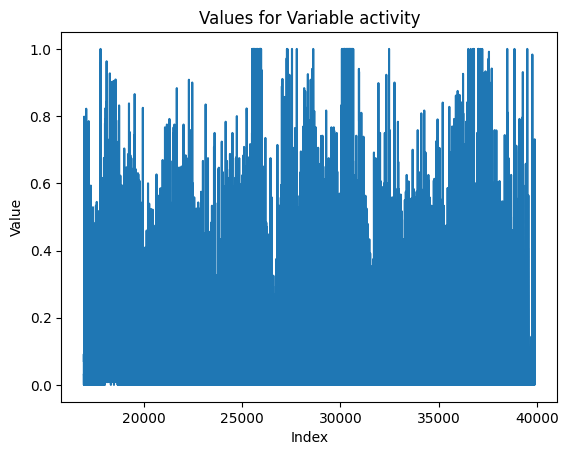

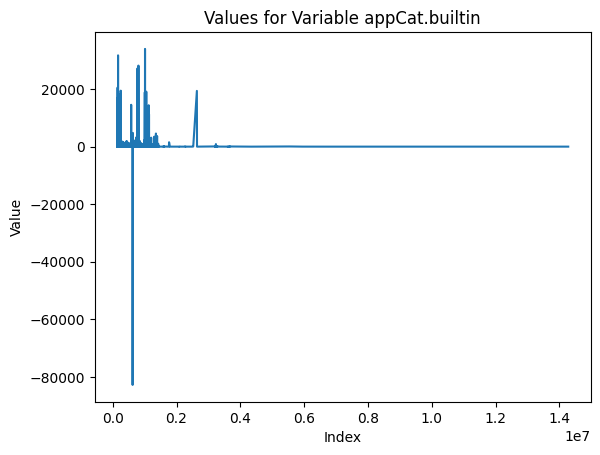

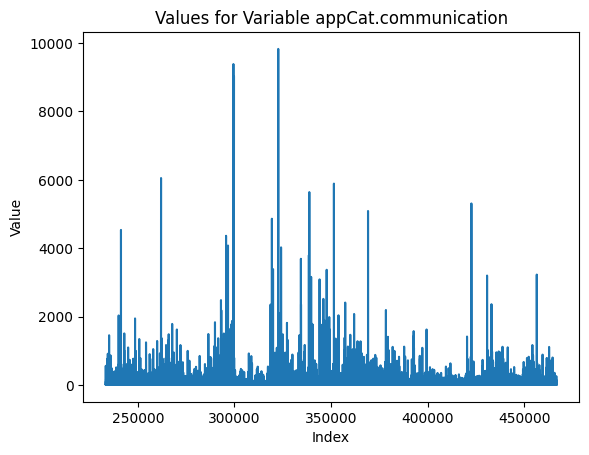

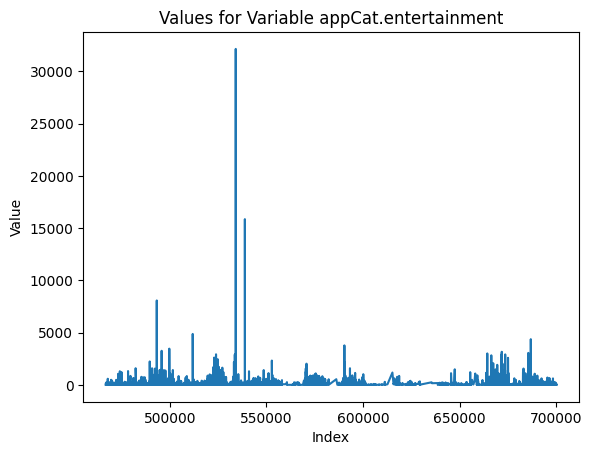

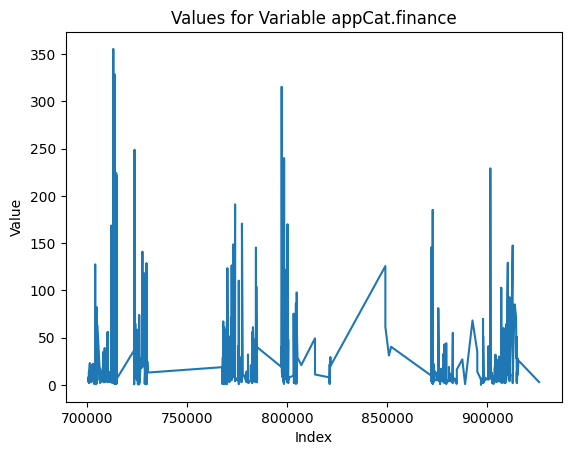

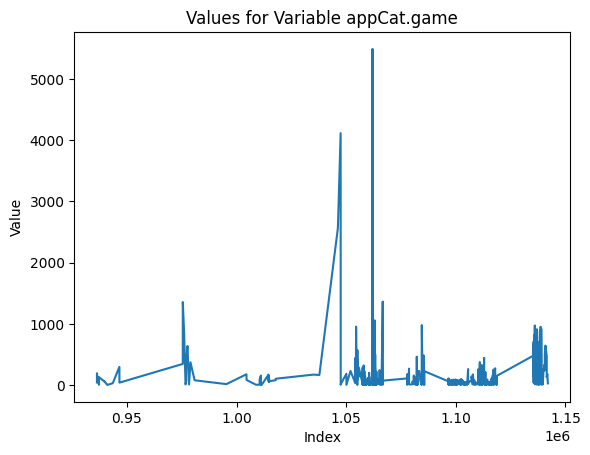

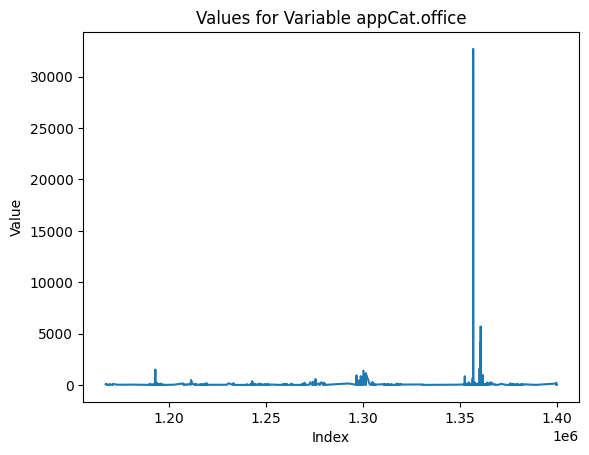

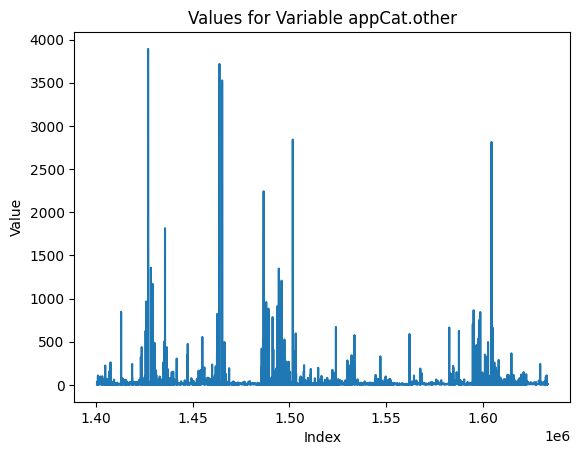

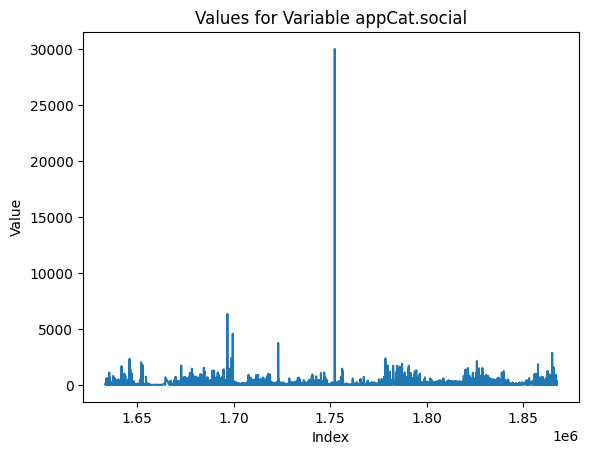

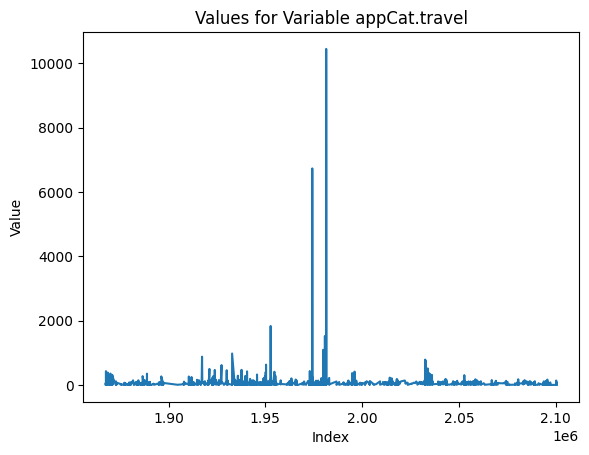

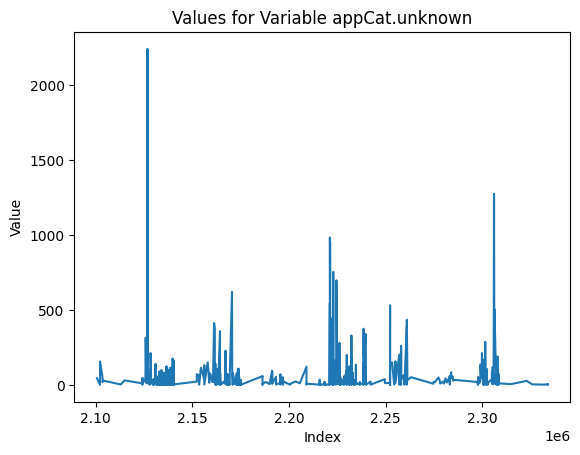

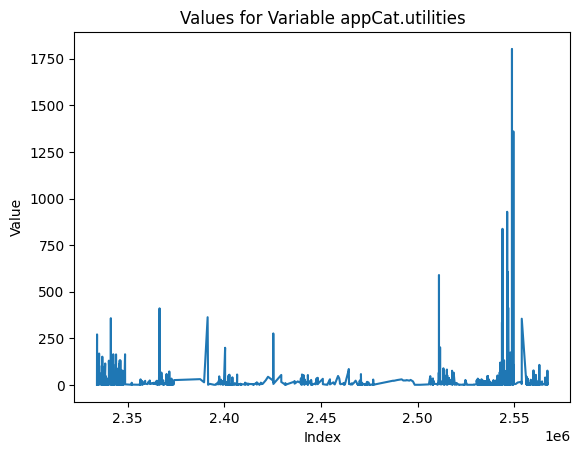

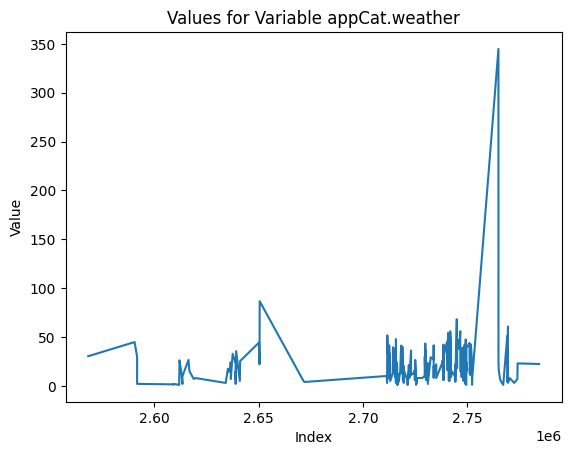

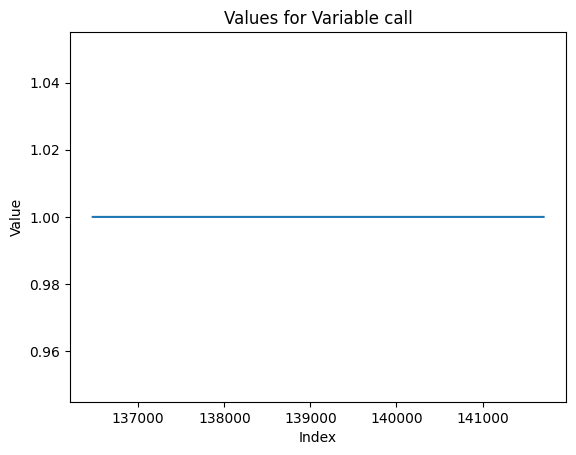

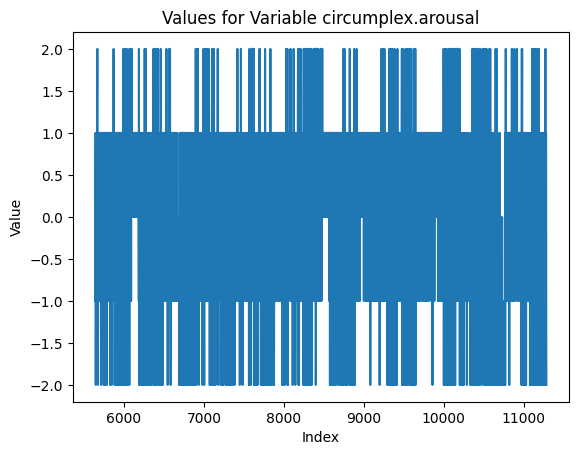

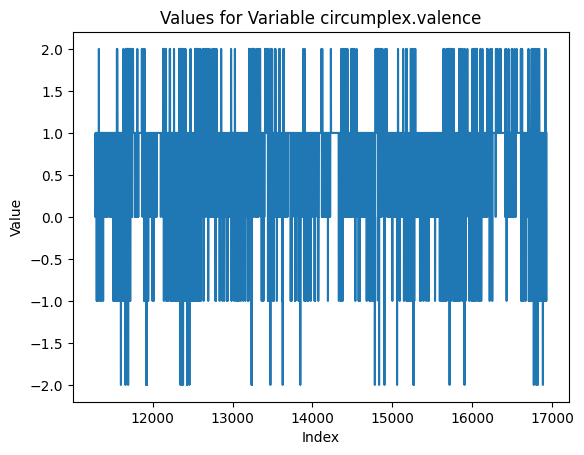

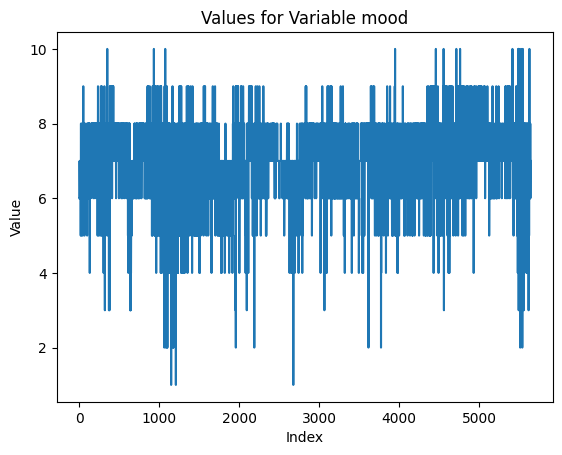

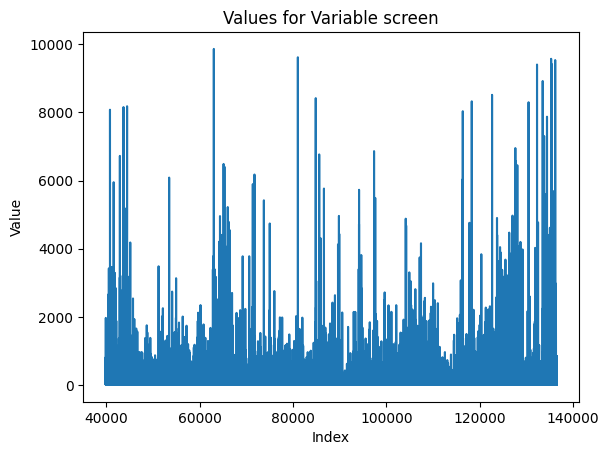

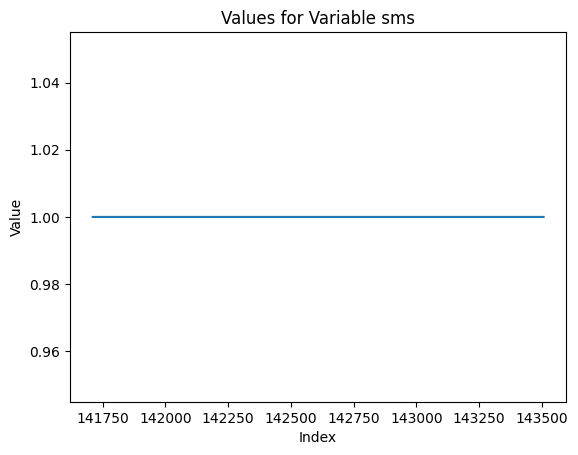

In [62]:
grouped = df.groupby('variable')


for name, group in grouped:
    # print(name, group)
    
    plt.figure() 

    sns.lineplot(data=group['value'])

    # Lineplot does not visualize well. We can use KDE
    
    # sns.kdeplot(data=group['value'])
    
    
    plt.title(f'Values for Variable {name}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.show()

Plotting mean of each group

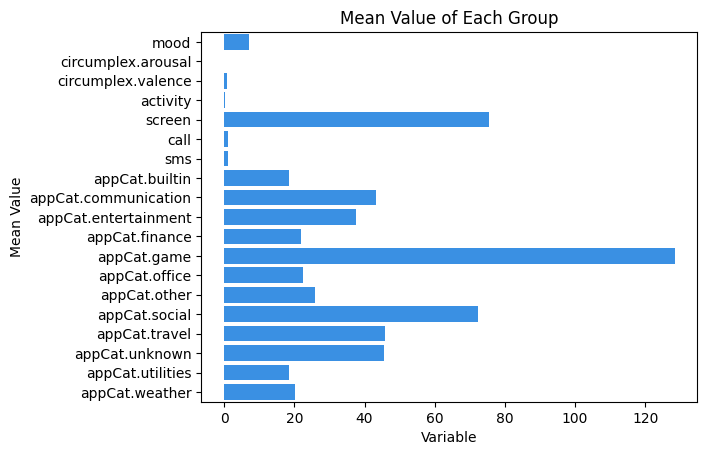

In [69]:
sns.barplot(y='variable', x='value', data=df, ci= None, color='dodgerblue')
plt.title('Mean Value of Each Group')
plt.xlabel('Variable')
plt.ylabel('Mean Value')
plt.show()

Plotting maximum value for each (To get and idea of range)

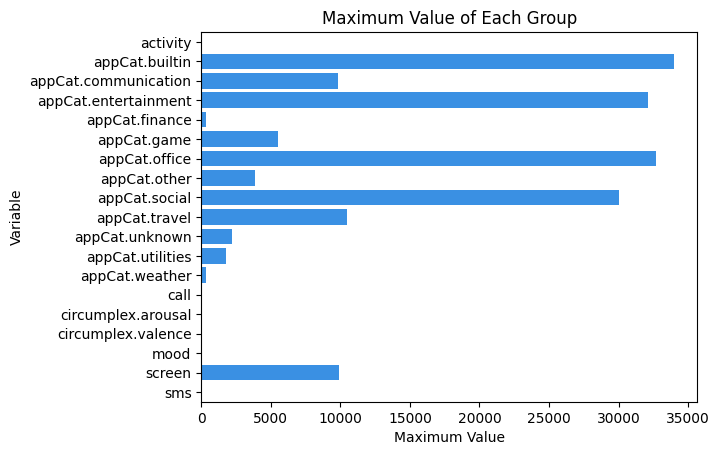

In [72]:
max_values = grouped['value'].max().reset_index()

sns.barplot(y='variable', x='value', data=max_values, color='dodgerblue')
plt.title('Maximum Value of Each Group')
plt.ylabel('Variable')
plt.xlabel('Maximum Value')
plt.show()